In [9]:
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def mid(npArr):
    return npArr.sum() / len(npArr)

#Расчет косвенной погрешности, если величина - произведение и частное данных
def sigma_mulls(val, sigsArr, parmsArr):
    sum = 0
    for i in range(len(sigsArr)):
        sum += (sigsArr[i] / parmsArr[i])**2
    return val * (sum)**0.5


#Расчет случайной погрешности среднего
def sigma_rand(valsArr):
    N = len(valsArr)
    valMid = sum(valsArr) / N
    msum = 0
    for val in valsArr:
        msum += (val - valMid)**2
        
    return (msum / (N * (N - 1))) ** 0.5


#MNK если y = kx
##DEPRECATED
def k_only(x, y):
    return mid(x * y) / mid(x * x)

##DEPRECATED
def k_only_sigma(x, y):
    return ((mid(x * x) * mid(y * y) - mid(x * y)**2) / (len(x) * mid(x * x)**2))**0.5

#MNK для y = kx + a
def k_coef(x, y):
    return (mid(x * y) - mid(x) * mid(y)) / (mid(x * x) - mid(x)**2)

def b_coef(x, y):
    return mid(y) - k_coef(x, y) * mid(x)

def k_sigma(x, y):
    return ((mid(y * y) - mid(y)**2) / (mid(x * x) - mid(x)**2) - k_coef(x, y)**2)**0.5  / len(x)**0.5



In [10]:
# Добавляем данные

# периоды
Tarr = np.array([21., 24., 27., 29., 32., 34., 36.])      #numpy массив сделанный из обычного python массива
Tarr = Tarr / 10 * 0.2  # перевод в мс

# ёмкости
Carr = np.array([0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])  #mkF

L = 0.14475 # Гн

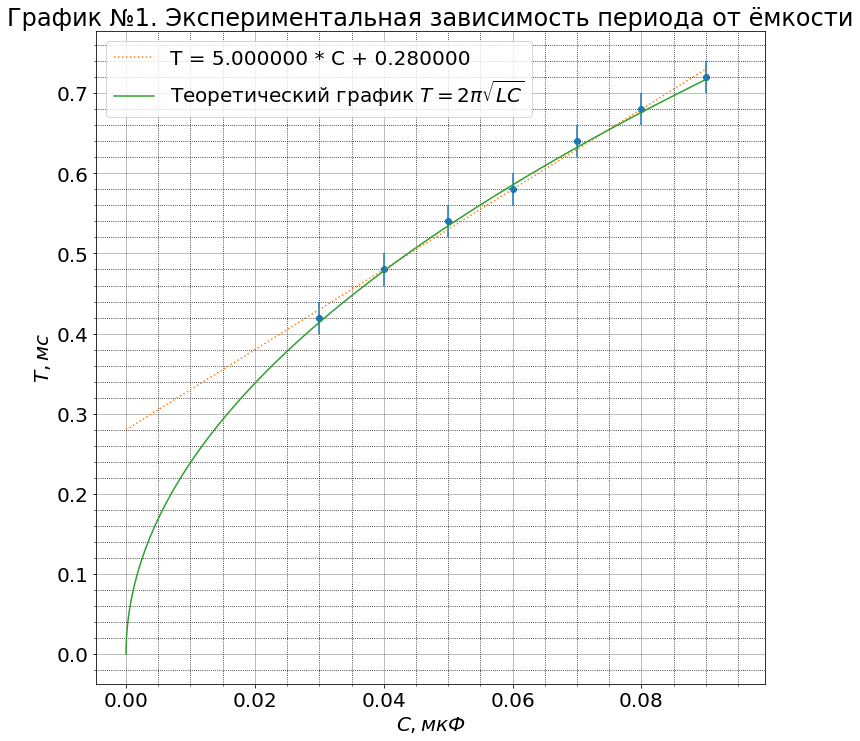

In [17]:
mpl.rcParams['font.size'] = 20 # Управление стилем, в данном случаем - размером шрифта 
    
# y = b + k

# объекты управления графиком
fig, ax = plt.subplots()

# Подписываем оси и график
ax.set_title("График №1. Экспериментальная зависимость периода от ёмкости")
ax.set_ylabel(r"$T, мc$")
ax.set_xlabel(r"$C, мкФ$")

fig.set_figwidth(12)
fig.set_figheight(12)

# Нанесём точки на график
ax.scatter(Carr, Tarr)
# Нарисуем кресты ошибок
ax.errorbar(Carr, Tarr, yerr=0.02, xerr=0.0005, fmt='.') 

xTwoPoint = np.linspace(0, Carr[-1], 2)  # Массив из двух чисел - первая и последняя координаты по оси х, заготовка к построению графика

# Найдём из МНК коэффициенты к и b: y = kx + b
k = k_coef(Carr, Tarr)
b = b_coef(Carr, Tarr)
# Теперь получим y - ки:
yForTwoPoint = k * xTwoPoint + b  # в numpy все операции со всем вектором сразу


#print(ys)

mStyle = ['--', '-', '-.', ':']  # - возможные стили линий, строим графики в чб forever

#Собственно отображаем прямую, соединяющую введённые в функцию точки, в качестве подписи пишем получившееся уравнение линии, стиль выберем 4ый
ax.plot(xTwoPoint, yForTwoPoint, label=r'T = %f * C + %f'%(k, b), linestyle=mStyle[3])


# Быстро сляпаем теоретическую зависимость - T ~ sqrt(C)
xs = np.linspace(0, Carr[-1], 5000)
ys = 2 * math.pi * (L * xs) ** 0.5
ax.plot(xs, ys, label=r'Теоретический график $T = 2\pi \sqrt{LC}$')

# Добавим мелкую сетку, без неё никуда
ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 0.5,
       alpha = 0.5)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

# Активируем легенду графика

# Внимание, запускаете вашу программу как сценарий, то что бы показать график
# Используйте эту команду
plt.legend()
plt.savefig('Зависимость периода от ёмкости.png') # Если нужно сохранить график из кода
plt.show()



In [18]:

# рассчитаем лог. декремент затухания 
#сопротивления, Ом
Rs = np.array([950., 1400., 1800., 2200., 2600., 3000.])
# Амплитуды, делений
As = np.array([[19., 7.],
                [17., 6.5],
                [19, 6],
                [17, 3],
                [12, 2],
                [18, 2]])

LogDec = np.array([])
sigsDec = np.array([])
for i in range(6):
    val = math.log(As[i][0] / As[i][1])

    LogDec = np.append(LogDec, val)
    sigsDec = np.append(sigsDec, ((2 * As[i][0]) ** (-2) + (2 * As[i][1]) ** (-2)) ** 0.5)

print(LogDec)

print(sigsDec / LogDec * 100)



#Расчёт Rcritical

Rcr = Rs * (4 * math.pi**2 / (LogDec**2) + 1)**0.5
print(Rcr)
sigRcr = (3 * math.pi) ** 2 * Rs /  ((3 * math.pi**2 / LogDec**2 + 1) * LogDec**3) * sigsDec
print(sigRcr)

print("Rmid: ", mid(Rcr[1:6]))
print("sigma: ", sigma_rand(Rcr[1 : 6]))








[ 0.99852883  0.96141117  1.15267951  1.73460106  1.79175947  2.19722458]
[  7.62341712   8.56596918   7.58144229   9.75682137  14.1452267
  11.4480094 ]
[ 6052.83711231  9256.01870969  9975.43245628  8267.08548956  9480.9250364
  9088.2261243 ]
[ 210.18938093  348.8795773   391.8154995   584.54852337  995.39928204
  885.87634793]
Rmid:  9213.53756325
sigma:  279.755162699


In [19]:
# Вычислим добротность по фазовой плоскости

nArr = np.array([2, 2, 1, 1, 1, 1])
ampArr = np.array([[8., 24.],
                    [5., 33.],
                    [10., 30.],
                    [10., 42.],
                    [5., 23.],
                    [7., 31.]])

Qs = np.array([])

for i in range(6):
    Qs = np.append(Qs, nArr[i] * math.pi / math.log(ampArr[i][1] / ampArr[i][0]))

print(Qs)












[ 5.71920173  3.32959905  2.85960087  2.18913423  2.05863483  2.11117606]
